# Classification ascendante hiérarchique

La classification ascendante hiérarchique (CAH) est une méthode de clustering très répandue. Elle propose une manière de répartir les observations entre elles en fonction de leurs distances les unes vis à vis des autres et offre des outils très utiles pour déterminer un nombre de classes adéquat à une problématique donnée. 

## Distances entre les individus  
La matrice de distances donne les distances de chaque observation à toutes les autres, en utilisant une métrique choisie par l'utilisateur. Elle permet de mesurer la dissimilarité entre les observations et de les classer en fonction de leur proximité.  À partir de ces distances on crée une matrice de liens qui agglomère les points au fur et à mesure en partant de la distance la plus faible, recalculant à chaque fois la distance d'une nouvelle classe avec les autres classes déjà créées (ou les points encore définies comme des classes à un seul élément). 

Reprenons l'exemple des fromages :  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Import des données
fromages = pd.read_csv('data/carac_fromages.txt', sep = "\t")
fromages.head(15)


,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
5,Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
6,Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
7,Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
8,Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28
9,Comte,399,92.0,220.5,32.4,55.9,1.3,29.2,120,51


In [3]:
# en numpy et sans la colonne fromage
fromages_np = fromages.iloc[:, [i for i in range(1, len(fromages.columns))]].to_numpy()
fromages_type = fromages.loc[:, "Fromages"]
# on centre-réduit
sc_x = StandardScaler()
fromage_cr = sc_x.fit_transform(fromages_np)

In [4]:
# on détermine la matrice des liens 
Z = linkage(fromage_cr,method='ward',metric='euclidean')
[Z.shape, fromages_np.shape]

[(28, 4), (29, 9)]

In [5]:
Z

array([[16.        , 20.        ,  0.7356902 ,  2.        ],
       [ 1.        , 23.        ,  0.82483528,  2.        ],
       [ 5.        , 18.        ,  0.89672969,  2.        ],
       [21.        , 26.        ,  0.95935419,  2.        ],
       [ 2.        ,  9.        ,  1.14064288,  2.        ],
       [22.        , 32.        ,  1.24708148,  3.        ],
       [25.        , 30.        ,  1.24972145,  3.        ],
       [17.        , 31.        ,  1.32826122,  3.        ],
       [12.        , 33.        ,  1.42130185,  3.        ],
       [15.        , 29.        ,  1.70034202,  3.        ],
       [ 0.        , 10.        ,  1.72093864,  2.        ],
       [27.        , 35.        ,  1.86859757,  4.        ],
       [ 4.        ,  7.        ,  1.88685685,  2.        ],
       [14.        , 24.        ,  1.92182722,  2.        ],
       [34.        , 40.        ,  2.20413434,  7.        ],
       [11.        , 36.        ,  2.35092294,  4.        ],
       [ 8.        , 44.

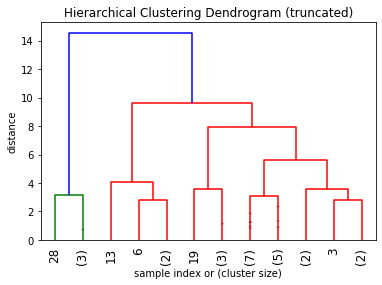

In [10]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

### Eye Candy

Even though this already makes for quite a nice visualization, we can pimp it even more by also annotating the distances inside the dendrogram by using some of the useful return values dendrogram():

In [11]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

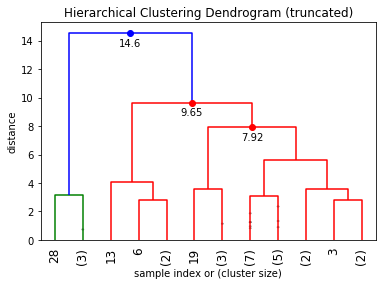

In [14]:


fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=7,  # useful in small plots so annotations don't overlap
)
plt.show()



In [22]:


from scipy.cluster.hierarchy import fcluster
max_d = 7
clusters = fcluster(Z, max_d, criterion='distance')
clusters



array([4, 4, 3, 4, 2, 4, 2, 2, 4, 3, 4, 4, 3, 2, 4, 1, 1, 4, 4, 3, 1, 4,
       4, 4, 4, 4, 4, 4, 1], dtype=int32)

In [ ]:
#How to get centroids from SciPy's hierarchical agglomerative clustering?
#https://stackoverflow.com/questions/9362304/how-to-get-centroids-from-scipys-hierarchical-agglomerative-clustering

In [25]:
lens = {}      # will contain the lengths for each cluster
centroids = {} # will contain the centroids of each cluster
for idx,clno in enumerate(clusters):
    centroids.setdefault(clno,np.zeros(9)) 
    centroids[clno] += fromage_cr[idx,:]
    lens.setdefault(clno,0)
    lens[clno] += 1
# Divide by number of observations in each cluster to get the centroid
for clno in centroids:
    centroids[clno] /= float(lens[clno])

In [26]:
centroids

{4: array([ 0.34416116,  0.49357194,  0.05143329,  0.37484078, -0.31453491,
        -0.28634902,  0.17656839,  0.27983707, -0.00747777]),
 3: array([ 0.99335436, -0.78740727,  1.33217289,  0.81261631, -0.13844465,
        -0.91023049,  1.47045163,  1.18589089,  1.6890194 ]),
 2: array([-0.26058013,  0.23798202, -0.82133586, -0.16694787,  1.99798908,
         1.82644787, -0.32447   , -0.34539305, -0.24416756]),
 1: array([-2.19545917, -1.54825548, -0.7294285 , -2.23874174, -0.52277108,
         0.30076596, -1.89639728, -2.02980539, -1.41307131])}

In [36]:
lens = {}      # will contain the lengths for each cluster
centroids = {} # will contain the centroids of each cluster
for idx,clno in enumerate(clusters):
    centroids.setdefault(clno,np.zeros(9)) 
    centroids[clno] += fromage_cr[idx,:]
    lens.setdefault(clno,0)
    lens[clno] += 1
# Divide by number of observations in each cluster to get the centroid
for clno in centroids:
    centroids[clno] /= float(lens[clno])
centroids

{4: array([ 0.34416116,  0.49357194,  0.05143329,  0.37484078, -0.31453491,
        -0.28634902,  0.17656839,  0.27983707, -0.00747777]),
 3: array([ 0.99335436, -0.78740727,  1.33217289,  0.81261631, -0.13844465,
        -0.91023049,  1.47045163,  1.18589089,  1.6890194 ]),
 2: array([-0.26058013,  0.23798202, -0.82133586, -0.16694787,  1.99798908,
         1.82644787, -0.32447   , -0.34539305, -0.24416756]),
 1: array([-2.19545917, -1.54825548, -0.7294285 , -2.23874174, -0.52277108,
         0.30076596, -1.89639728, -2.02980539, -1.41307131])}


Knowing k:

Another way starting from the dendrogram is to say "i can see i have k=2" clusters. You can then use:


In [20]:


k=5
fcluster(Z, k, criterion='maxclust')



array([5, 4, 3, 5, 2, 4, 2, 2, 4, 3, 5, 4, 3, 2, 5, 1, 1, 4, 4, 3, 1, 4,
       4, 4, 5, 4, 4, 4, 1], dtype=int32)

In [7]:
from scipy.spatial.distance import pdist
y = pdist(Z)
y

array([15.29731829, 11.18149962,  7.81345158, 17.80909842, 13.46333989,
       13.50052696, 11.10635586, 13.65540418,  9.16136197, 18.89366863,
       18.74255797, 17.72921839,  4.6267614 , 27.40723131, 16.9590382 ,
       25.55034445, 23.37319426, 23.13863417, 38.2043589 , 21.85926666,
       17.60468326, 37.71160667, 26.45662058, 47.26345794, 51.55216902,
       55.32111488, 56.86878328,  6.40352784, 20.22419579, 14.03922129,
       22.873091  , 25.02359943, 17.92354423, 14.91159859, 15.28942484,
       13.06916222, 28.72437014, 16.31342667, 13.08447138, 37.48202857,
       16.59303901, 22.41605627, 18.81340425, 16.27975758, 48.50938148,
       31.0387675 , 23.05278535, 47.68295043, 26.21775483, 56.92953523,
       60.92908205, 64.56659165, 65.15828468, 17.88865344,  9.48996805,
       22.04819145, 23.34790361, 17.72529885, 16.59141874, 14.92132007,
        9.4699166 , 27.89165695, 11.08965066, 10.86511965, 36.7655995 ,
       19.13412339, 26.40485806, 23.12279793, 21.20723941, 47.72

In [9]:
from scipy.cluster.hierarchy import centroid
centr = centroid(y)
centr

array([[ 4.        , 10.        ,  2.31013921,  2.        ],
       [ 7.        ,  9.        ,  2.85279584,  2.        ],
       [11.        , 20.        ,  3.41193114,  2.        ],
       [ 8.        , 15.        ,  3.44444413,  2.        ],
       [ 5.        ,  6.        ,  3.60555224,  2.        ],
       [17.        , 18.        ,  3.60561607,  2.        ],
       [12.        , 28.        ,  3.93166584,  3.        ],
       [ 0.        , 13.        ,  4.6267614 ,  2.        ],
       [25.        , 26.        ,  4.89718898,  2.        ],
       [16.        , 23.        ,  5.6423396 ,  2.        ],
       [ 3.        , 32.        ,  5.68625961,  3.        ],
       [29.        , 31.        ,  6.39439155,  4.        ],
       [ 1.        ,  2.        ,  6.40352784,  2.        ],
       [21.        , 39.        ,  7.35610045,  5.        ],
       [19.        , 22.        ,  7.36524114,  2.        ],
       [24.        , 36.        ,  7.82797249,  3.        ],
       [33.        , 37.

## Matrice de liens
Après avoir classé les individus en fonction de leur distance les uns vis à vis des autres (avec la matrice de distance), la matrice de liens renvoyée contient n-1 lignes et 4 colonnes. A chaque itération de l'algorithme, les indices Z[i, 0] et Z[i, 1] sont combinés pour former une classe n+i. Lorsque les indices sont inférieurs à n, ils se réfèrent à des clusters uniquement constitués d'observations de départ. La distance entre deux clusters est donnée par la 3e colonne. La dernière valeur explicite le nombre d'observations originales dans le cluster ainsi formé.  



## Le dendogramme

Cette matrice des liens nous permet de construire le dendogramme. Cet outil est au coeur de l'analyse en CAH. il représente visuellement l'agglomération progressive des classes en fonction de la mesure de leur similarité. Au début, chaque observation est une classe, puis on regroupe les observations les plus semblables dans une classe commune, etc...  

Sur notre base de données, le dendogramme donne le résultat suivant :  

In [5]:
fromages_type.to_numpy()

array(['CarredelEst', 'Babybel', 'Beaufort', 'Bleu', 'Camembert',
       'Cantal', 'Chabichou', 'Chaource', 'Cheddar', 'Comte',
       'Coulomniers', 'Edam', 'Emmental', 'Fr.chevrepatemolle',
       'Fr.fondu.45', 'Fr.frais20nat.', 'Fr.frais40nat.', 'Maroilles',
       'Morbier', 'Parmesan', 'Petitsuisse40', 'PontlEveque', 'Pyrenees',
       'Reblochon', 'Rocquefort', 'SaintPaulin', 'Tome', 'Vacherin',
       'Yaourtlaitent.nat.'], dtype=object)

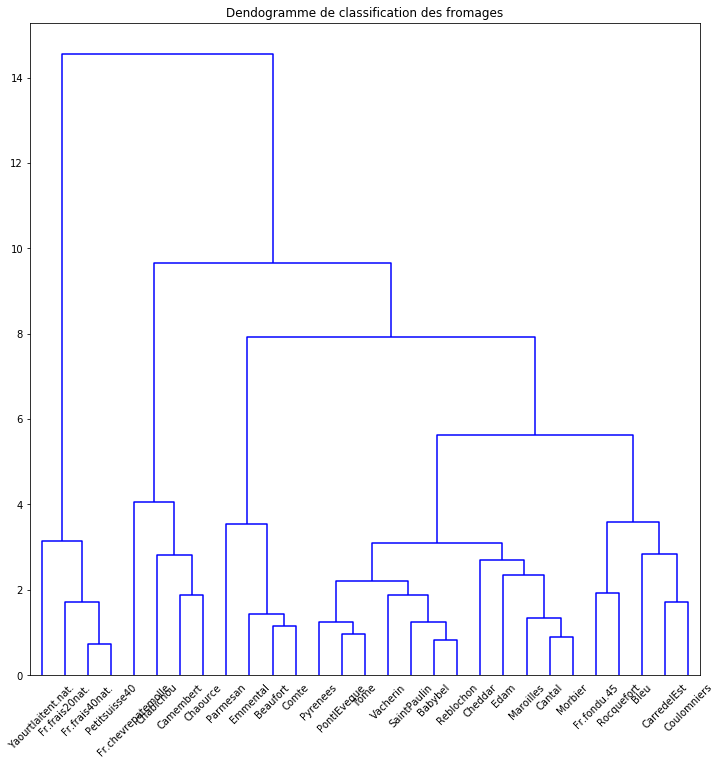

In [6]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=fromages_type.to_numpy(), orientation='top',color_threshold=0)
plt.show()

Avec une régle, on peut choisir différents niveaux de classification selon l'abitrage que l'on souhaite faire entre variance intra-classes et inter-classes. Par exemple : 

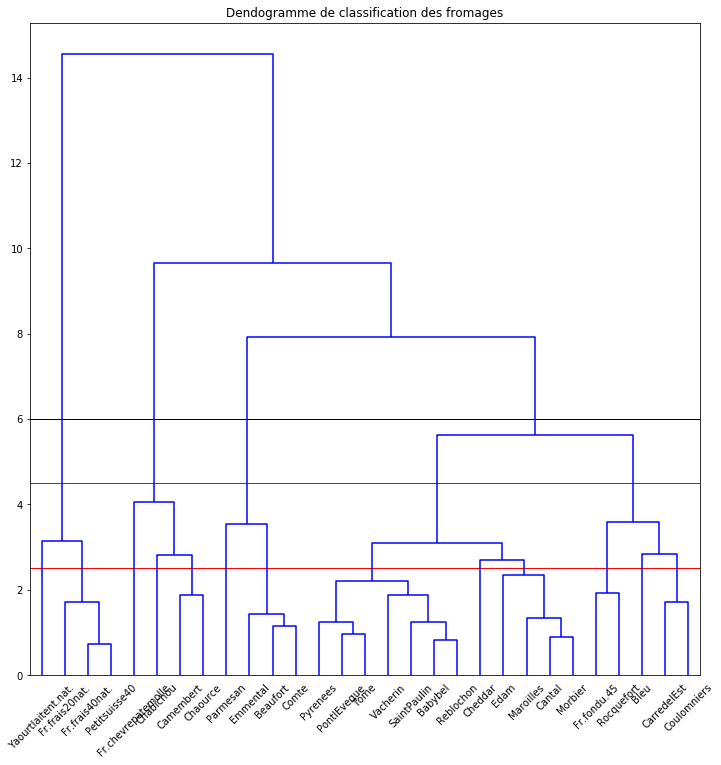

In [7]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=fromages_type.to_numpy(), orientation='top',color_threshold=0)
ax.axhline(y=2.5,c="red",linewidth=1,zorder=0)
ax.axhline(y=4.5,c="green",linewidth=1,zorder=0)
ax.axhline(y=6,c="black",linewidth=1,zorder=0)
plt.show()

On peut colorer le dendogramme en fonction de la distance maximum souhaitée à l'intérieur des classes : 


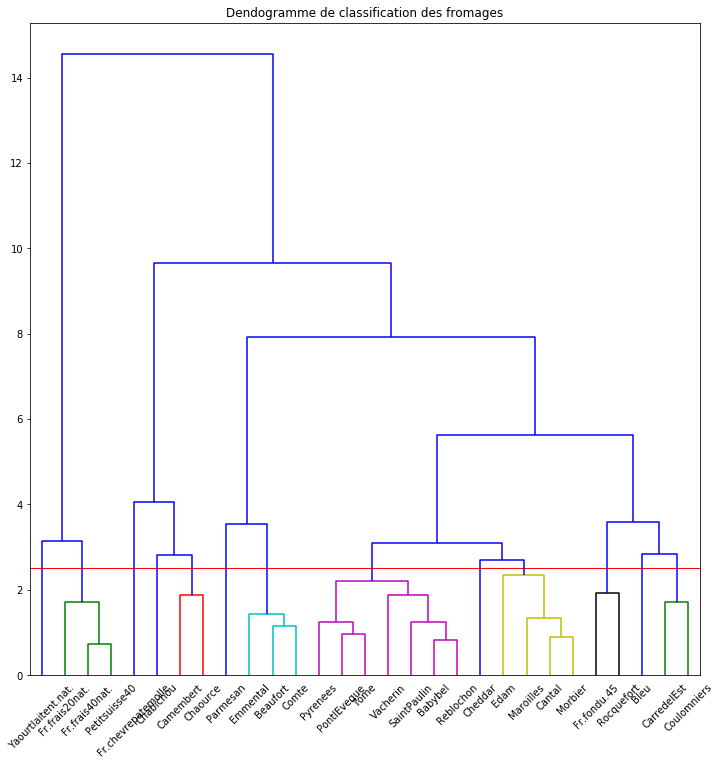

In [8]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=fromages_type.to_numpy(), orientation='top',color_threshold=2.5)
ax.axhline(y=2.5,c="red",linewidth=1,zorder=0)
plt.show()

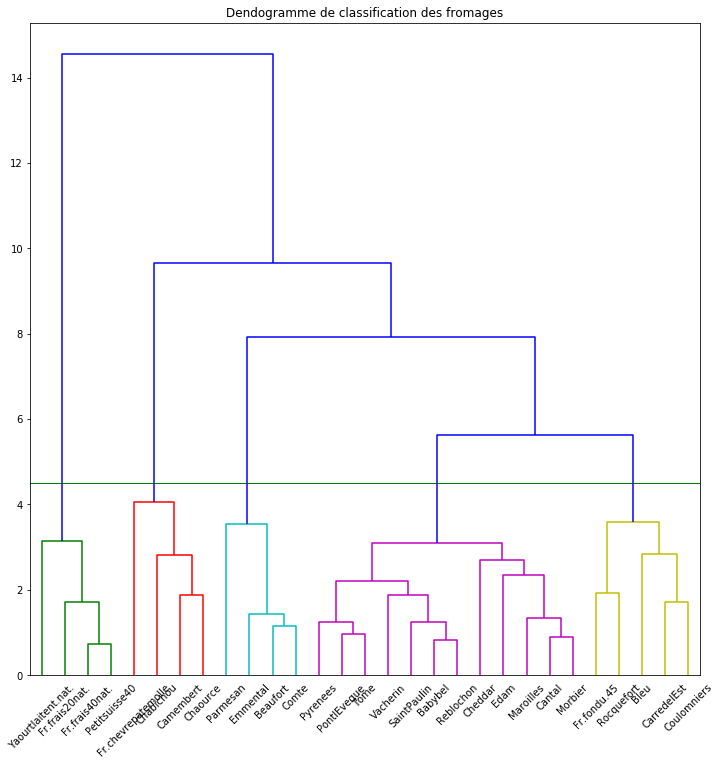

In [9]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=fromages_type.to_numpy(), orientation='top',color_threshold=4.5)
ax.axhline(y=4.5,c="green",linewidth=1,zorder=0)
plt.show()

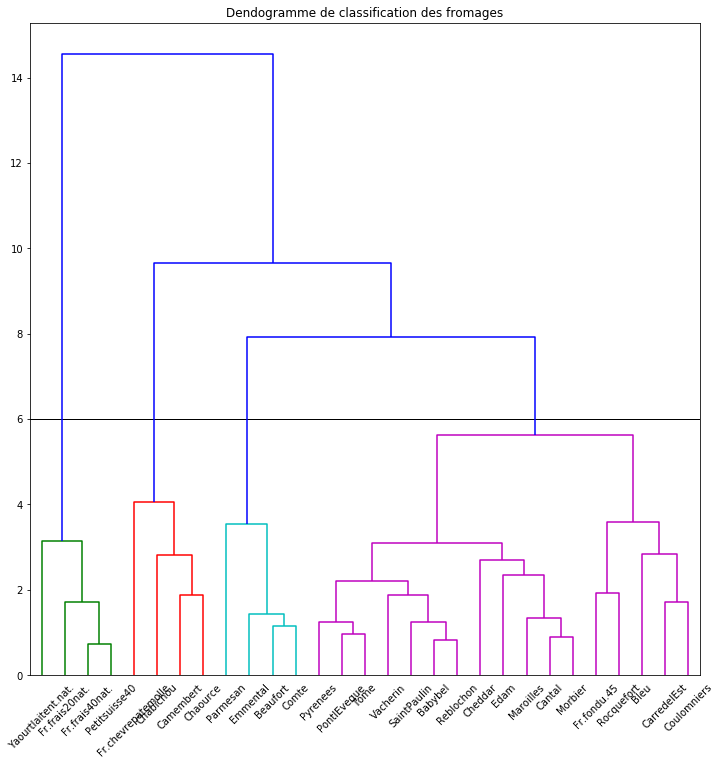

In [10]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des fromages")
dendrogram(Z,labels=fromages_type.to_numpy(), orientation='top',color_threshold=6)
ax.axhline(y=6,c="black",linewidth=1,zorder=0)
plt.show()

## Découpage en classes  
Selon l'étude du dendogramme on choisit un nombre de classes. Je le fixe personnellement à 5 car je trouve que l'homogénéité à l'intérieur de chaque classe est satisfaisante. On utilise la fonction `fcluster` et le seuil correspondant au nombre de classes choisi :   

In [11]:
from scipy.cluster.hierarchy import fcluster
classes_cah = fcluster(Z, t = 4.5, criterion = 'distance')

# On trie par index
index_cah = np.argsort(classes_cah)
classes_cah[index_cah]

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5], dtype=int32)

On affiche les labels des fromages et la classe à laquelle ils appartiennent : 

In [12]:
pd.DataFrame({"Fromage" : fromages_type.to_numpy()[index_cah], "Groupe" : classes_cah[index_cah]})

,Fromage,Groupe
0,Yaourtlaitent.nat.,1
1,Petitsuisse40,1
2,Fr.frais40nat.,1
3,Fr.frais20nat.,1
4,Camembert,2
5,Chabichou,2
6,Chaource,2
7,Fr.chevrepatemolle,2
8,Beaufort,3
9,Parmesan,3


### Cas pratique 1  CAH
- Chargez les données iris contenues dans `sklearn.datasets`  
- Faites une classification ascendante hiérarchique et comparez vos résultats avec les espèces connues des fleurs

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
values, target = load_iris(return_X_y=True)

In [14]:
# on centre-réduit
#sc_iris = StandardScaler()
#iris_cr = sc_iris.fit_transform(values)

In [15]:
# on détermine la matrice des liens 
Z = linkage(values,method='ward',metric='euclidean')
[Z.shape, values.shape]

[(149, 4), (150, 4)]

In [16]:
Z

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

In [23]:
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


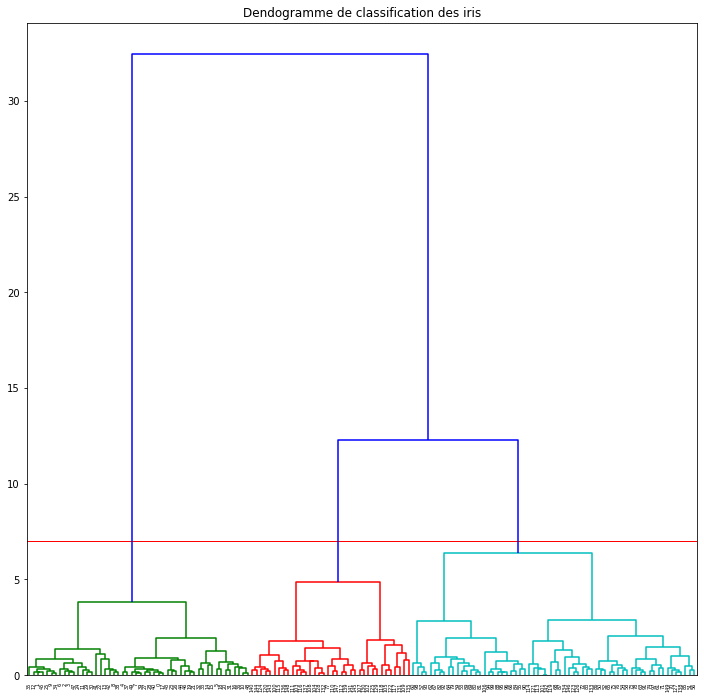

In [18]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des iris")
dendrogram(Z, orientation='top',color_threshold=7)
ax.axhline(y=7,c="red",linewidth=1,zorder=0)
plt.show()

In [28]:
from scipy.cluster.hierarchy import fcluster
classes_cahIris = fcluster(Z, t = 7, criterion = 'distance')

classes_cahIris-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [27]:
# On trie par index
index_cah = np.argsort(classes_cahIris)
classes_cah[index_cah]-1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [20]:
tablodeComparassion = pd.DataFrame({ "Groupe" : classes_cah[index_cah]-1, "compare Target" : target})
tablodeComparassion[10
                    :101]

,Groupe,compare Target
10,0,0
11,0,0
12,0,0
13,0,0
14,0,0
...,...,...
96,2,1
97,2,1
98,2,1
99,2,1


In [50]:
iris["target"] = target
iris["trouvé"] = classes_cahIris-1
iris
def nove(columns):
    if columns in ["target"]==2 & ["trouvé"]==1:
        return 4
    if columns in ["target"]==0:
        return 0
    if columns in ["target"]==1:
        return 1
    else:
        return 2

In [56]:
def sentiment(polarity):
    if pd.isnull(polarity):
        return None
    else:
        if polarity <0:
            text = 'Negative'
        if polarity == 0:
            text = 'Neutral'
        if polarity > 0:
            text = 'Positive'
    return text

In [ ]:
iris['nove'] = iris[['target', "trouvé"]].apply(nov)
dataJoin

In [57]:
iris["nove"] = iris["nove"].apply(nov)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,trouvé,nove
0,5.1,3.5,1.4,0.2,0,0,8
1,4.9,3.0,1.4,0.2,0,0,8
2,4.7,3.2,1.3,0.2,0,0,8
3,4.6,3.1,1.5,0.2,0,0,8
4,5.0,3.6,1.4,0.2,0,0,8
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,8
146,6.3,2.5,5.0,1.9,2,2,8
147,6.5,3.0,5.2,2.0,2,1,8
148,6.2,3.4,5.4,2.3,2,1,8


In [ ]:
iris["nove"] = iris["nove"].apply(lambda x:0 if x =='<=50K' else 1)

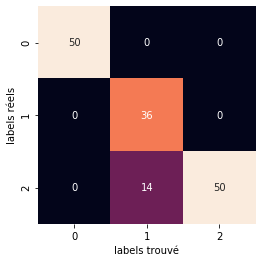

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(classes_cah[index_cah]-1, target)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('labels trouvé')
plt.ylabel('labels réels');

### Cas pratique 2  CAH
- Faites tourner une CAH sur les données utilisées pour illustrer DBSCAN (code ci-dessous). Illustrez vos résultats avec un nuage de points qui changent de couleur par classe. A-t-on de meilleurs résultats qu'avec k-means?

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1], c = classes_cahBlob)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

NameError: name 'classes_cahBlob' is not defined

In [ ]:
# on centre-réduit
sc_X = StandardScaler()
X_cr = sc_X.fit_transform(X)

In [ ]:
# on détermine la matrice des liens 
Z = linkage(X,method='ward',metric='euclidean')
[Z.shape, X.shape]

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_title("Dendogramme de classification des iris")
dendrogram(Z, orientation='top',color_threshold=30)
ax.axhline(y=30,c="red",linewidth=1,zorder=0)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
classes_cahBlob = fcluster(Z, t = 30, criterion = 'distance')

# On trie par index
index_cah = np.argsort(classes_cahBlob)
classes_cahBlob[index_cah]

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(classes_cahBlob, y+1)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('labels prédits')
plt.ylabel('labels réels');

In [ ]:
y